In [9]:
from signal_utils import *

## Test Signal

Fmax = 0.425


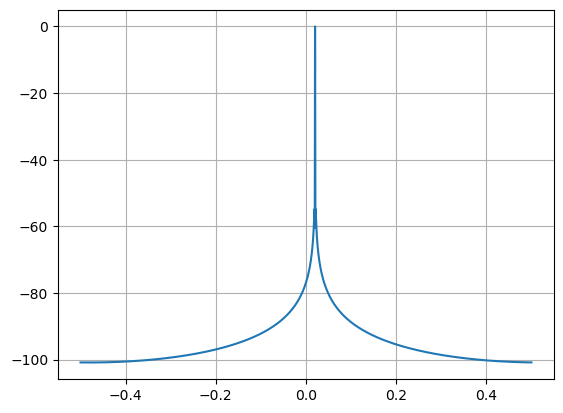

In [68]:
N = 2**12
n = np.arange(N)

perc = 0.15
Fmax = 0.5 * (1 - perc)
print(f"Fmax = {Fmax}")

F = 0.02

x = 1.0 * np.exp(1j * 2*np.pi*F*n)
xr = x.real
xi = x.imag

plotdB(x, True)

## Interpolation

In [76]:
AdB_interpolation = 80
deltaPass = 10**(-AdB_interpolation/20)
deltaStop = deltaPass

OSR = 8
F = [Fmax, 1-Fmax]
delta = [deltaPass, deltaStop]

# Interpolation by a factor of 8
xr_osr8 = np.real(interpolate(xr, OSR, F, delta, show=False, prt=False))
xi_osr8 = np.real(interpolate(xi, OSR, F, delta, show=False, prt=False))
x_osr8 = xr_osr8 + 1j*xi_osr8

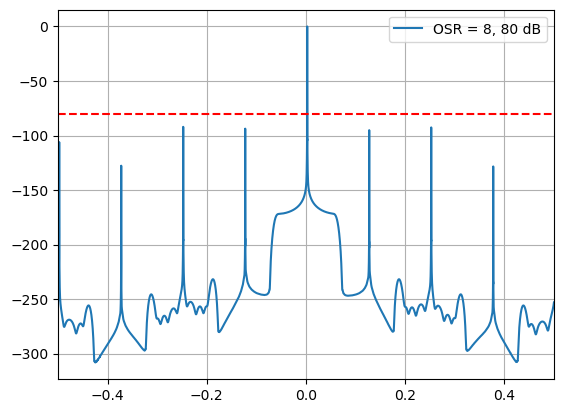

In [77]:
freqs_osr8, xfftdB_osr8, angle_osr8 = fftdB(x_osr8)
xmin = -0.5
xmax = 0.5
plt.plot(freqs_osr8, xfftdB_osr8, label=f"OSR = {OSR}, {AdB_interpolation} dB")
plt.plot([xmin, xmax], [-AdB_interpolation, -AdB_interpolation], '--r')
plt.legend()
plt.xlim([xmin, xmax])
plt.grid()
plt.show();

## Delta-Sigma Modulation (from cpp)

In [78]:
# Path to C++ executable
cpp_path = "../build/delta-sigma"
xr_in_path = "./data/serial/xr_in.txt"
xi_in_path = "./data/serial/xi_in.txt"
xr_out_path = "./data/serial/xr_out.txt"
xi_out_path = "./data/serial/xi_out.txt"
iir_path = "../data/input/deltaSigma_iirs.txt"

In [79]:
quant_type = ["mid-tread", "mid-rise"]

xr_in = [xr, xr_osr8]
xi_in = [xi, xi_osr8]

In [80]:
xr_deltaSigma = []
xi_deltaSigma = []
x_deltaSigma = []

for xr_i,xi_i in zip(xr_in, xi_in):
    tmp = 4/np.max(xr_i)
    xr_input = np.array(xr_i) * tmp
    xi_input = np.array(xi_i) * tmp
    
    np.savetxt(xr_in_path, xr_input, fmt="%.18e")
    np.savetxt(xi_in_path, xi_input, fmt="%.18e")
    
    # Call the C++ program with input and output file paths as arguments
    subprocess.run([cpp_path, xr_in_path, xi_in_path, xr_out_path, xi_out_path, iir_path, quant_type[0]])
    
    xr_deltaSigma_tmp = np.round(np.loadtxt(xr_out_path))
    xi_deltaSigma_tmp = np.round(np.loadtxt(xi_out_path))
    x_deltaSigma_tmp = xr_deltaSigma_tmp + 1j*xi_deltaSigma_tmp

    xr_deltaSigma.append(xr_deltaSigma_tmp)
    xi_deltaSigma.append(xi_deltaSigma_tmp)
    x_deltaSigma.append(x_deltaSigma_tmp)

File written to ./data/serial/xr_out.txt
File written to ./data/serial/xi_out.txt
File written to ./data/serial/xr_out.txt
File written to ./data/serial/xi_out.txt


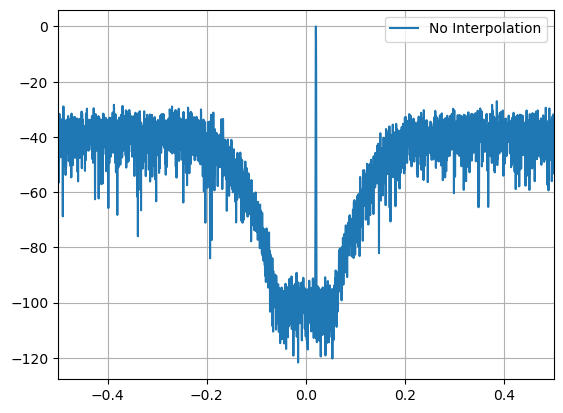

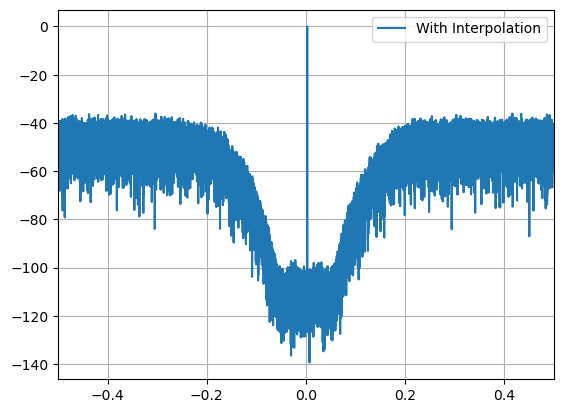

In [81]:
labels=["No Interpolation", "With Interpolation"]

for x_i,label_i in zip(x_deltaSigma, labels):
    freqs_i, xfftdB_i, angle_i = fftdB(x_i)
    xmin = -0.5
    xmax = 0.5
    plt.plot(freqs_i, xfftdB_i, label=label_i)
    plt.legend()
    plt.xlim([xmin, xmax])
    plt.grid()
    plt.show();